In [ ]:
import pandas as pd

df = pd.read_csv('/content/country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [ ]:
df1=df.groupby(["country",'iso_code','vaccines'])['total_vaccinations','people_vaccinated','people_fully_vaccinated',
                                           'daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                                           "people_fully_vaccinated_per_hundred",'daily_vaccinations_per_million'].max().reset_index()

df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,country,iso_code,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Argentina,ARG,Sputnik V,318033.0,272323.0,45710.0,15656.0,0.70,0.60,0.10,346.0
1,Austria,AUT,Pfizer/BioNTech,195886.0,NaN,NaN,12552.0,2.17,NaN,NaN,1394.0
2,Bahrain,BHR,"Pfizer/BioNTech, Sinopharm",144130.0,NaN,NaN,11106.0,8.47,NaN,NaN,6527.0
3,Belgium,BEL,"Moderna, Pfizer/BioNTech",231466.0,229863.0,1603.0,14970.0,2.00,1.98,0.01,1292.0
4,Bermuda,BMU,Pfizer/BioNTech,2932.0,2932.0,NaN,278.0,4.71,4.71,NaN,4464.0


In [ ]:
import plotly.express as px

data2=df1[['country','total_vaccinations']].nlargest(20,'total_vaccinations')

fig=px.bar(data2,x='country',y='total_vaccinations',title='Total vaccinations according to countries')

fig.show()

In [ ]:
data3=df1[['country','people_vaccinated']].nlargest(20,'people_vaccinated')

fig=px.bar(data3, x='country',y='people_vaccinated',title='Number of poeple that is vaccinated')

fig.show()

In [ ]:
dict_vaccines = {}
for vac in df['vaccines'].unique() :
    mask = (df['vaccines'] == vac)
    df_temp = df[mask]
    dict_vaccines["df_"+vac] = df_temp


In [ ]:
for vaccin, dataframe in dict_vaccines.items() :
    dict_vaccines[vaccin] = dataframe.drop(columns = ['total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million','source_name','source_website'])

In [ ]:
for vaccin, dataframe in dict_vaccines.items() :
    dict_vaccines[vaccin] = dataframe.dropna()
    dict_vaccines[vaccin] = dict_vaccines[vaccin].rename(columns={'iso_code':'iso_a3'})

In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 15 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [ ]:
import geopandas
import matplotlib

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns

world['iso_a3']

0      FJI
1      TZA
2      ESH
3      CAN
4      USA
      ... 
172    SRB
173    MNE
174    -99
175    TTO
176    SSD
Name: iso_a3, Length: 177, dtype: object

In [ ]:
import geopandas
import matplotlib

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
dict_map = {}
for vaccin, dataframe in dict_vaccines.items() :
    dict_map[vaccin] = world.merge(dataframe,on='iso_a3')

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:667: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:667: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



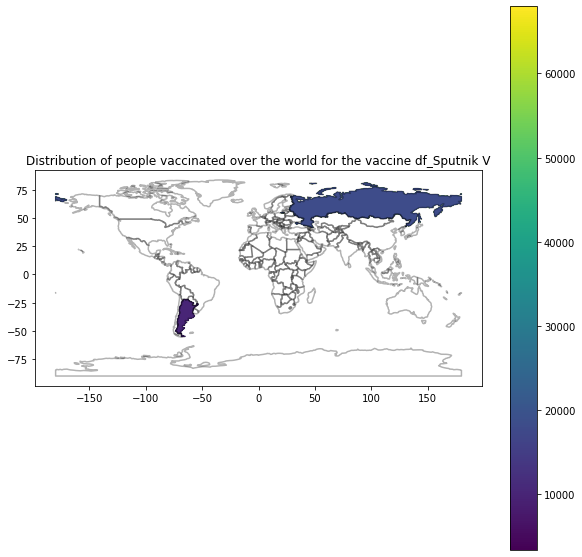

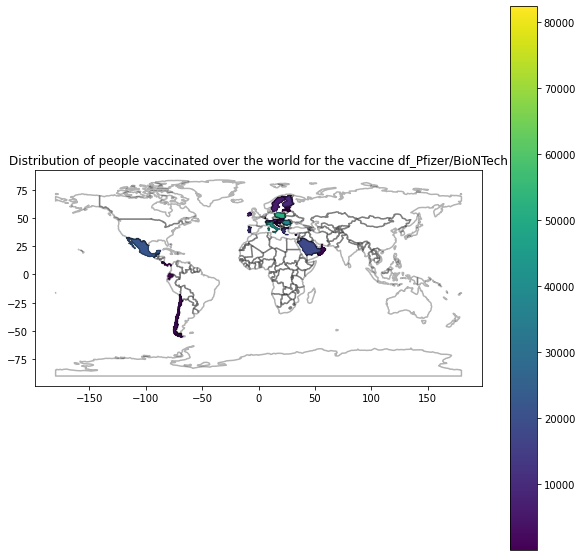

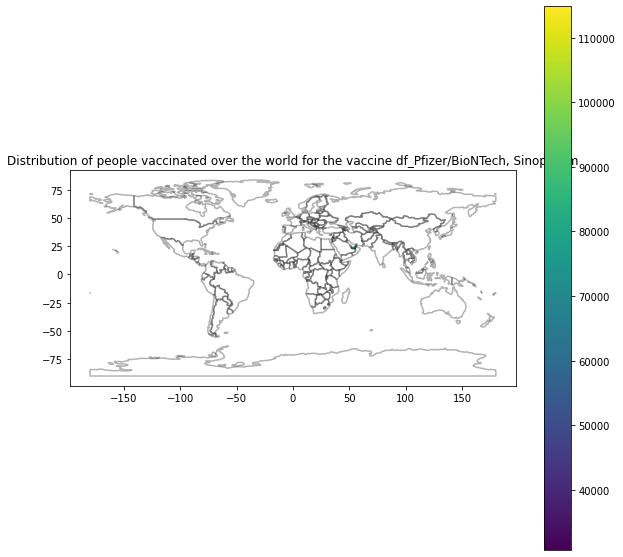

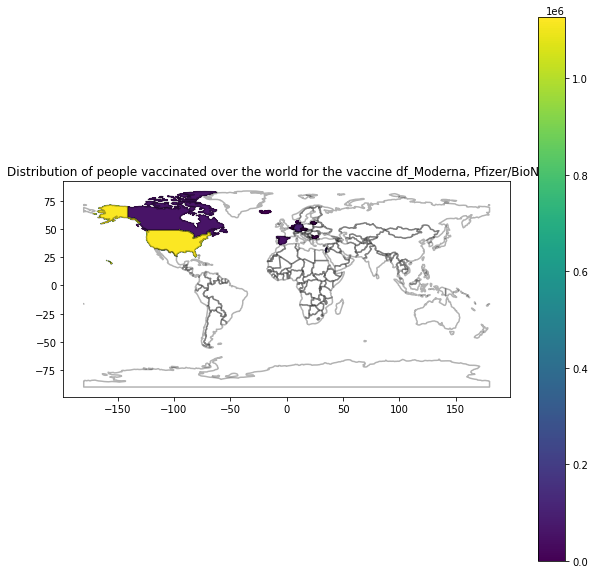

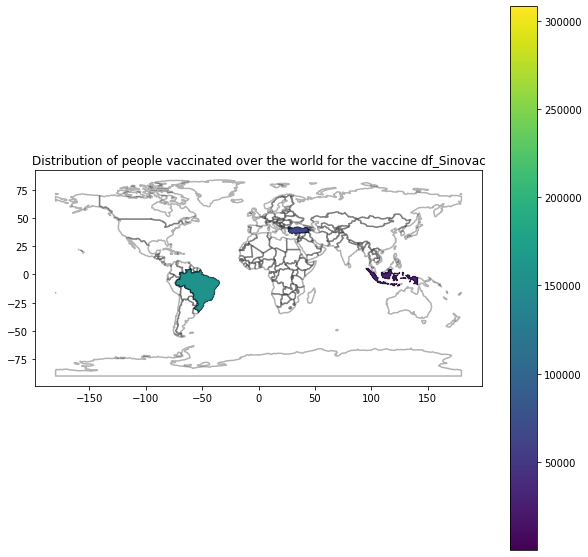

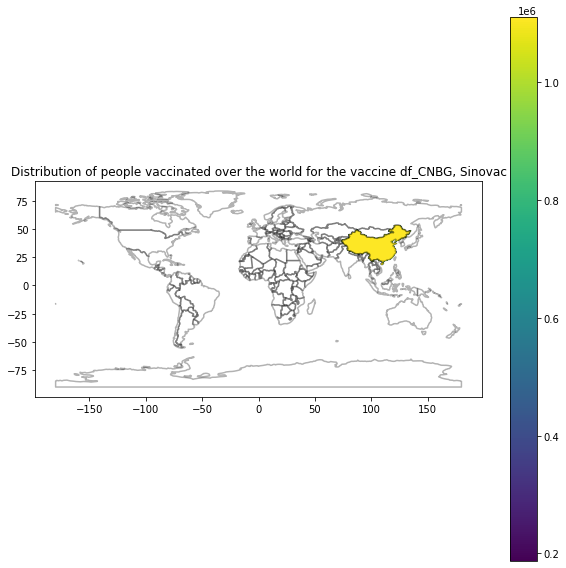

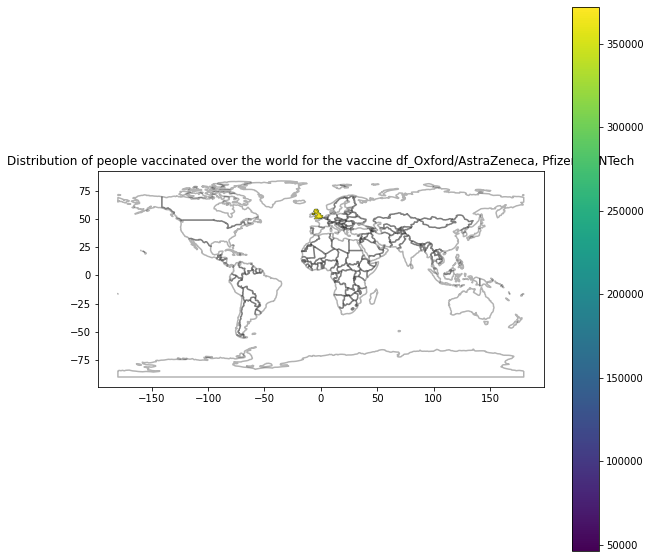

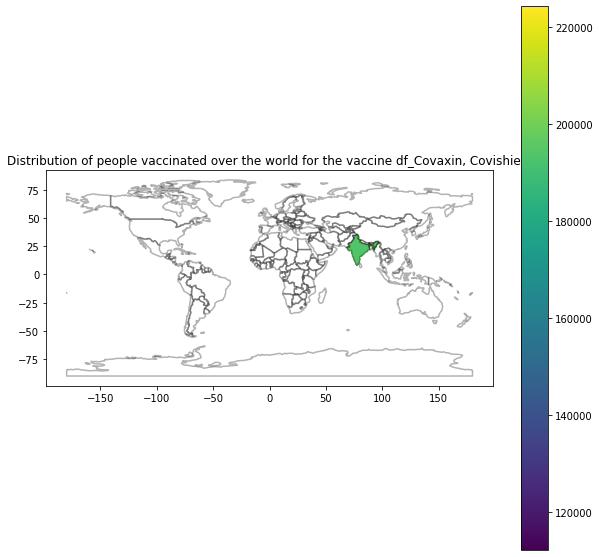

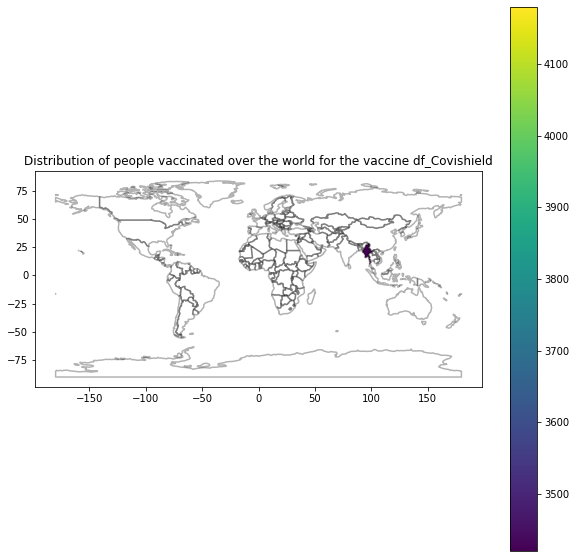

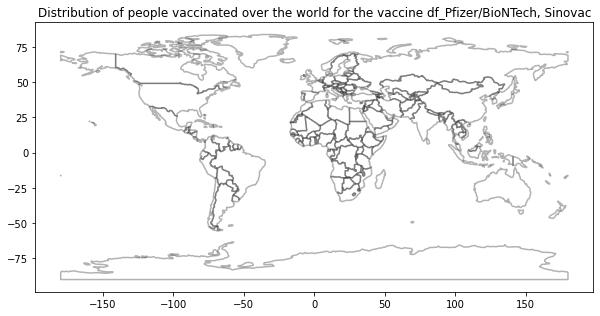

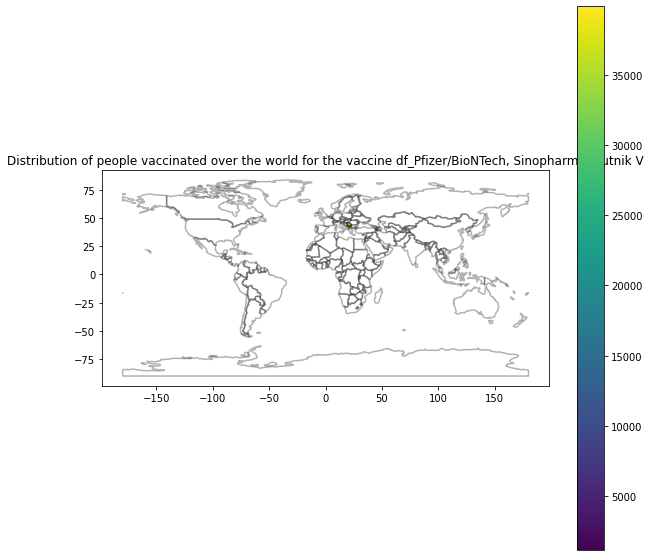

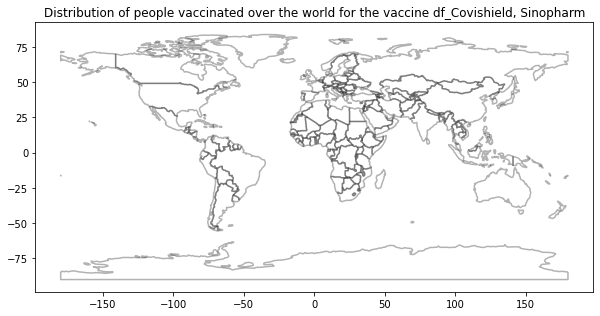

In [ ]:
import matplotlib.pyplot as plt

for vaccin, dataframe in dict_map.items() :
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    dataframe['daily_vaccinations']
    df_group = dataframe[['iso_a3','daily_vaccinations']].groupby(by = 'iso_a3').sum()
    dataframe.plot(column = 'daily_vaccinations',ax=ax,legend=True)
    world.boundary.plot(ax=ax,edgecolor='black',alpha = 0.3)
    ax.title.set_text('Distribution of people vaccinated over the world for the vaccine ' + vaccin)
    fig.show()